In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09ce6e7d907aa868638ac3380bcb6753


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | fort nelson
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | chumikan
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | uk
City not found. Skipping...
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | mataram
Processing Record 19 of Set 1 | capreol
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | severnyy
Processing Record 23 of Set 1 | port elizabeth
Pr

Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | tabas
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | henties bay
Processing Record 47 of Set 4 | isangel
Processing Record 48 of Set 4 | kaeo
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | safaga
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | kiama
Processing Record 3 of Set 5 | zhezkazgan
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | jizan
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | kedrovyy
Processing Record 8 of Set 5 | hutang
Processing Record 9 of Set 5 | goderich
Processing Record 10 of Set 5 | kapaa
Processing Record 11 of Set 5 | leningradskiy
Processing Record 12 of Set 5 | vostok
Processing Record 13 of Set 5 | broken hill
Processing Record 14 of Set 5 | cookeville
Processing Record 15 of Set 5 | sorong
Processing Record 16 of Set 5 | av

Processing Record 32 of Set 8 | malakal
Processing Record 33 of Set 8 | davila
Processing Record 34 of Set 8 | wageningen
Processing Record 35 of Set 8 | bakchar
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | kosonsoy
Processing Record 38 of Set 8 | anchorage
Processing Record 39 of Set 8 | xochistlahuaca
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | barguzin
Processing Record 42 of Set 8 | hamilton
Processing Record 43 of Set 8 | krasnoselkup
Processing Record 44 of Set 8 | georgiyevka
Processing Record 45 of Set 8 | balabac
Processing Record 46 of Set 8 | carsamba
Processing Record 47 of Set 8 | oksfjord
Processing Record 48 of Set 8 | entre rios
Processing Record 49 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 50 of Set 8 | tskaltubo
Processing Record 1 of Set 9 | volga
Processing Record 2 of Set 9 | whitehorse
Processing Record 3 of Set 9 | harper
Processing Record 4 of Set 9 | pangnirt

Processing Record 21 of Set 12 | jimenez
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | katsuura
Processing Record 24 of Set 12 | oranjestad
Processing Record 25 of Set 12 | salinopolis
Processing Record 26 of Set 12 | gigmoto
Processing Record 27 of Set 12 | bagdarin
Processing Record 28 of Set 12 | bullhead city
Processing Record 29 of Set 12 | udachnyy
Processing Record 30 of Set 12 | westpunt
City not found. Skipping...
Processing Record 31 of Set 12 | yabrud
Processing Record 32 of Set 12 | kerki
City not found. Skipping...
Processing Record 33 of Set 12 | toora-khem
Processing Record 34 of Set 12 | sambava
Processing Record 35 of Set 12 | girne
Processing Record 36 of Set 12 | merauke
Processing Record 37 of Set 12 | bargal
City not found. Skipping...
Processing Record 38 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 39 of Set 12 | belmonte
Processing Record 40 of Set 12 | zabinka
City not found. Skipping...
Processing Record 41 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort Nelson,58.8053,-122.7002,9.99,85,20,0.00,CA,2022-11-12 04:58:34
1,Chuy,-33.6971,-53.4616,60.03,97,10,6.89,UY,2022-11-12 04:57:53
2,Rikitea,-23.1203,-134.9692,74.08,87,99,15.57,PF,2022-11-12 04:58:34
3,Cidreira,-30.1811,-50.2056,66.56,93,100,11.59,BR,2022-11-12 04:58:35
4,Jamestown,42.0970,-79.2353,56.84,74,100,17.27,US,2022-11-12 04:58:35
5,Saskylakh,71.9167,114.0833,-26.68,100,95,1.90,RU,2022-11-12 04:58:35
6,Ushuaia,-54.8000,-68.3000,40.66,65,0,9.22,AR,2022-11-12 04:58:36
7,Kodiak,57.7900,-152.4072,42.31,100,100,9.22,US,2022-11-12 04:58:36
8,Chumikan,54.7183,135.3150,20.79,78,93,19.84,RU,2022-11-12 04:58:36
9,Punta Arenas,-53.1500,-70.9167,37.51,75,0,4.61,CL,2022-11-12 04:58:37


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

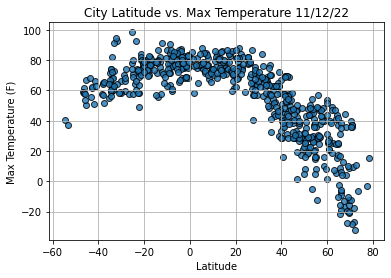

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

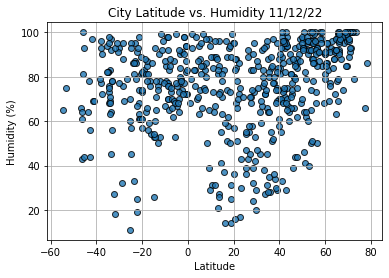

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

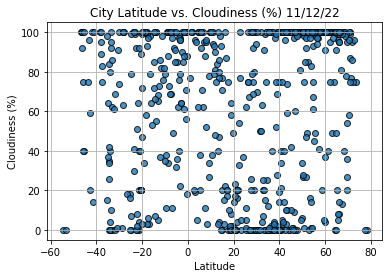

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

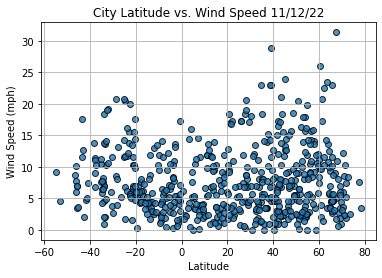

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Lat                       19.7297
Lng                       -155.09
Max Temp                    73.26
Humidity                       95
Cloudiness                     49
Wind Speed                   5.99
Country                        US
Date          2022-11-12 04:55:04
Name: 13, dtype: object

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort Nelson,58.8053,-122.7002,9.99,85,20,0.00,CA,2022-11-12 04:58:34
4,Jamestown,42.0970,-79.2353,56.84,74,100,17.27,US,2022-11-12 04:58:35
5,Saskylakh,71.9167,114.0833,-26.68,100,95,1.90,RU,2022-11-12 04:58:35
7,Kodiak,57.7900,-152.4072,42.31,100,100,9.22,US,2022-11-12 04:58:36
8,Chumikan,54.7183,135.3150,20.79,78,93,19.84,RU,2022-11-12 04:58:36
...,...,...,...,...,...,...,...,...,...
570,Kushiro,42.9750,144.3747,54.43,68,100,17.13,JP,2022-11-12 05:09:46
573,Nanortalik,60.1432,-45.2371,26.80,85,100,8.43,GL,2022-11-12 05:13:35
574,Shache,38.4167,77.2406,46.36,30,99,0.96,CN,2022-11-12 05:13:36
575,Manica,49.0000,-1.1667,48.67,87,81,5.32,FR,2022-11-12 05:13:36


In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort Nelson,58.8053,-122.7002,9.99,85,20,0.00,CA,2022-11-12 04:58:34
4,Jamestown,42.0970,-79.2353,56.84,74,100,17.27,US,2022-11-12 04:58:35
5,Saskylakh,71.9167,114.0833,-26.68,100,95,1.90,RU,2022-11-12 04:58:35
7,Kodiak,57.7900,-152.4072,42.31,100,100,9.22,US,2022-11-12 04:58:36
8,Chumikan,54.7183,135.3150,20.79,78,93,19.84,RU,2022-11-12 04:58:36


In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

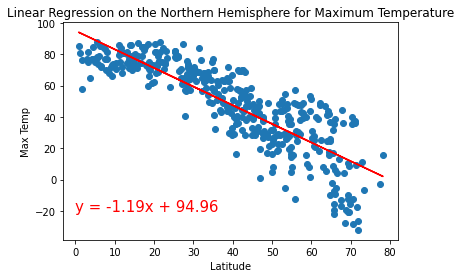

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,-20))

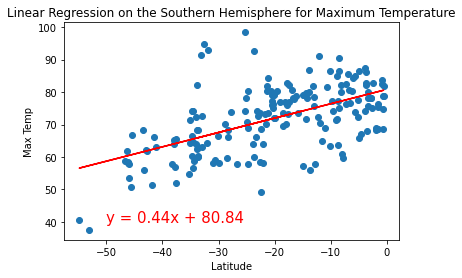

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,40))

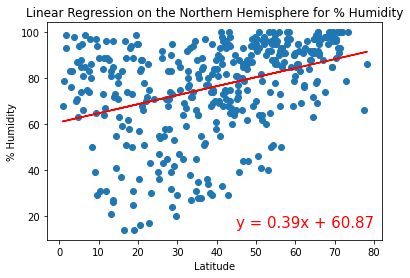

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,15) )


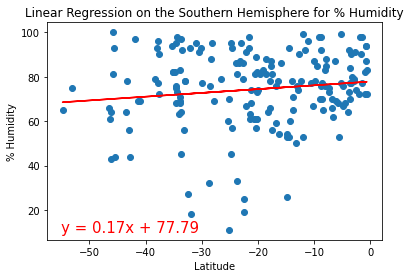

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,10) )


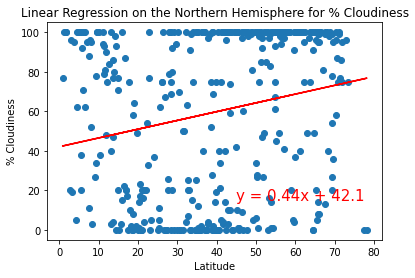

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,15) )


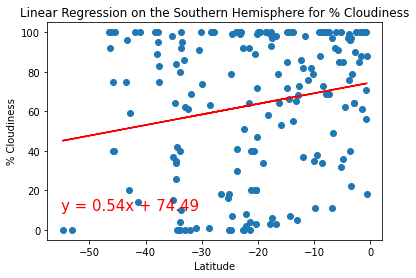

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,10) )


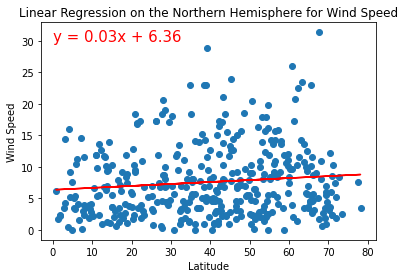

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,30) )


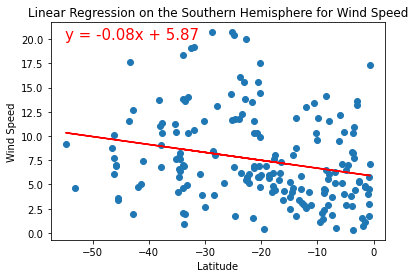

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function.
plot_linear_regression(x_values,y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,20) )
